# Unit End Project
**Student:** Desiree Hodge

# Step 1: Data Wrangling

## 1.1 Import libraries and load the CSV

In [1]:
import pandas as pd
import numpy as np


file_path = "AusApparalSales4thQrt2020.csv"

df = pd.read_csv(file_path)

df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [2]:
df.shape


(7560, 6)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
df.describe(include='all')


,Date,Time,State,Group,Unit,Sales
count,7560,7560,7560,7560,7560.000000,7560.000000
unique,90,3,7,4,NaN,NaN
top,1-Oct-2020,Morning,WA,Kids,NaN,NaN
freq,84,2520,1080,1890,NaN,NaN
mean,NaN,NaN,NaN,NaN,18.005423,45013.558201
std,NaN,NaN,NaN,NaN,12.901403,32253.506944
min,NaN,NaN,NaN,NaN,2.000000,5000.000000
25%,NaN,NaN,NaN,NaN,8.000000,20000.000000
50%,NaN,NaN,NaN,NaN,14.000000,35000.000000
75%,NaN,NaN,NaN,NaN,26.000000,65000.000000


In [8]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique()[:20])  # show first 20 unique values



Unique values in Date:
['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020']

Unique values in Time:
[' Morning' ' Afternoon' ' Evening']

Unique values in State:
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']

Unique values in Group:
[' Kids' ' Men' ' Women' ' Seniors']


## 1.2 Cleaning Code

In [9]:
# Strip leading/trailing spaces from all string columns
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

df.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [10]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in Date:
['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


## 1.3 Normalize the numeric columns (Unit, Sales)

In [12]:
# Identify numeric columns
numeric_cols = ['Unit', 'Sales']

# Apply Min-Max Normalization
for col in numeric_cols:
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head()


,Date,Time,State,Group,Unit,Sales,Unit_norm,Sales_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [13]:
df.describe()


,Date,Unit,Sales,Unit_norm,Sales_norm
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


# Step 2: Data Analysis

## 2.1 Descriptive Statistics (Sales & Units)

In [14]:
import scipy.stats as stats

# Descriptive stats for Units
units_mean = df['Unit'].mean()
units_median = df['Unit'].median()
units_mode = df['Unit'].mode()[0]
units_std = df['Unit'].std()

# Descriptive stats for Sales
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]
sales_std = df['Sales'].std()

units_mean, units_median, units_mode, units_std, sales_mean, sales_median, sales_mode, sales_std


(np.float64(18.00542328042328),
 np.float64(14.0),
 np.int64(9),
 np.float64(12.90140277758643),
 np.float64(45013.5582010582),
 np.float64(35000.0),
 np.int64(22500),
 np.float64(32253.506943966073))

## 2.2 Highest & Lowest Sales Groups

In [15]:
# Total sales by group
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
group_sales


Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

## 2.3 Highest & Lowest Sales States

In [16]:
# Total sales by state
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_sales


State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

## 2.4 Weekly, Monthly & Quarterly Reports

In [ ]:
# Weekly Sales Summary
weekly_sales = df.resample('W', on='Date')['Sales'].sum()
weekly_sales


Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [19]:
# Monthly Sales Summary
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
monthly_sales


Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

In [21]:
# Quarterly Sales Summary
quarterly_sales = df.resample('QE', on='Date')['Sales'].sum()
quarterly_sales


Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

# Step 3: Data Visualization

## 3.1 State-Wise Sales Analysis 

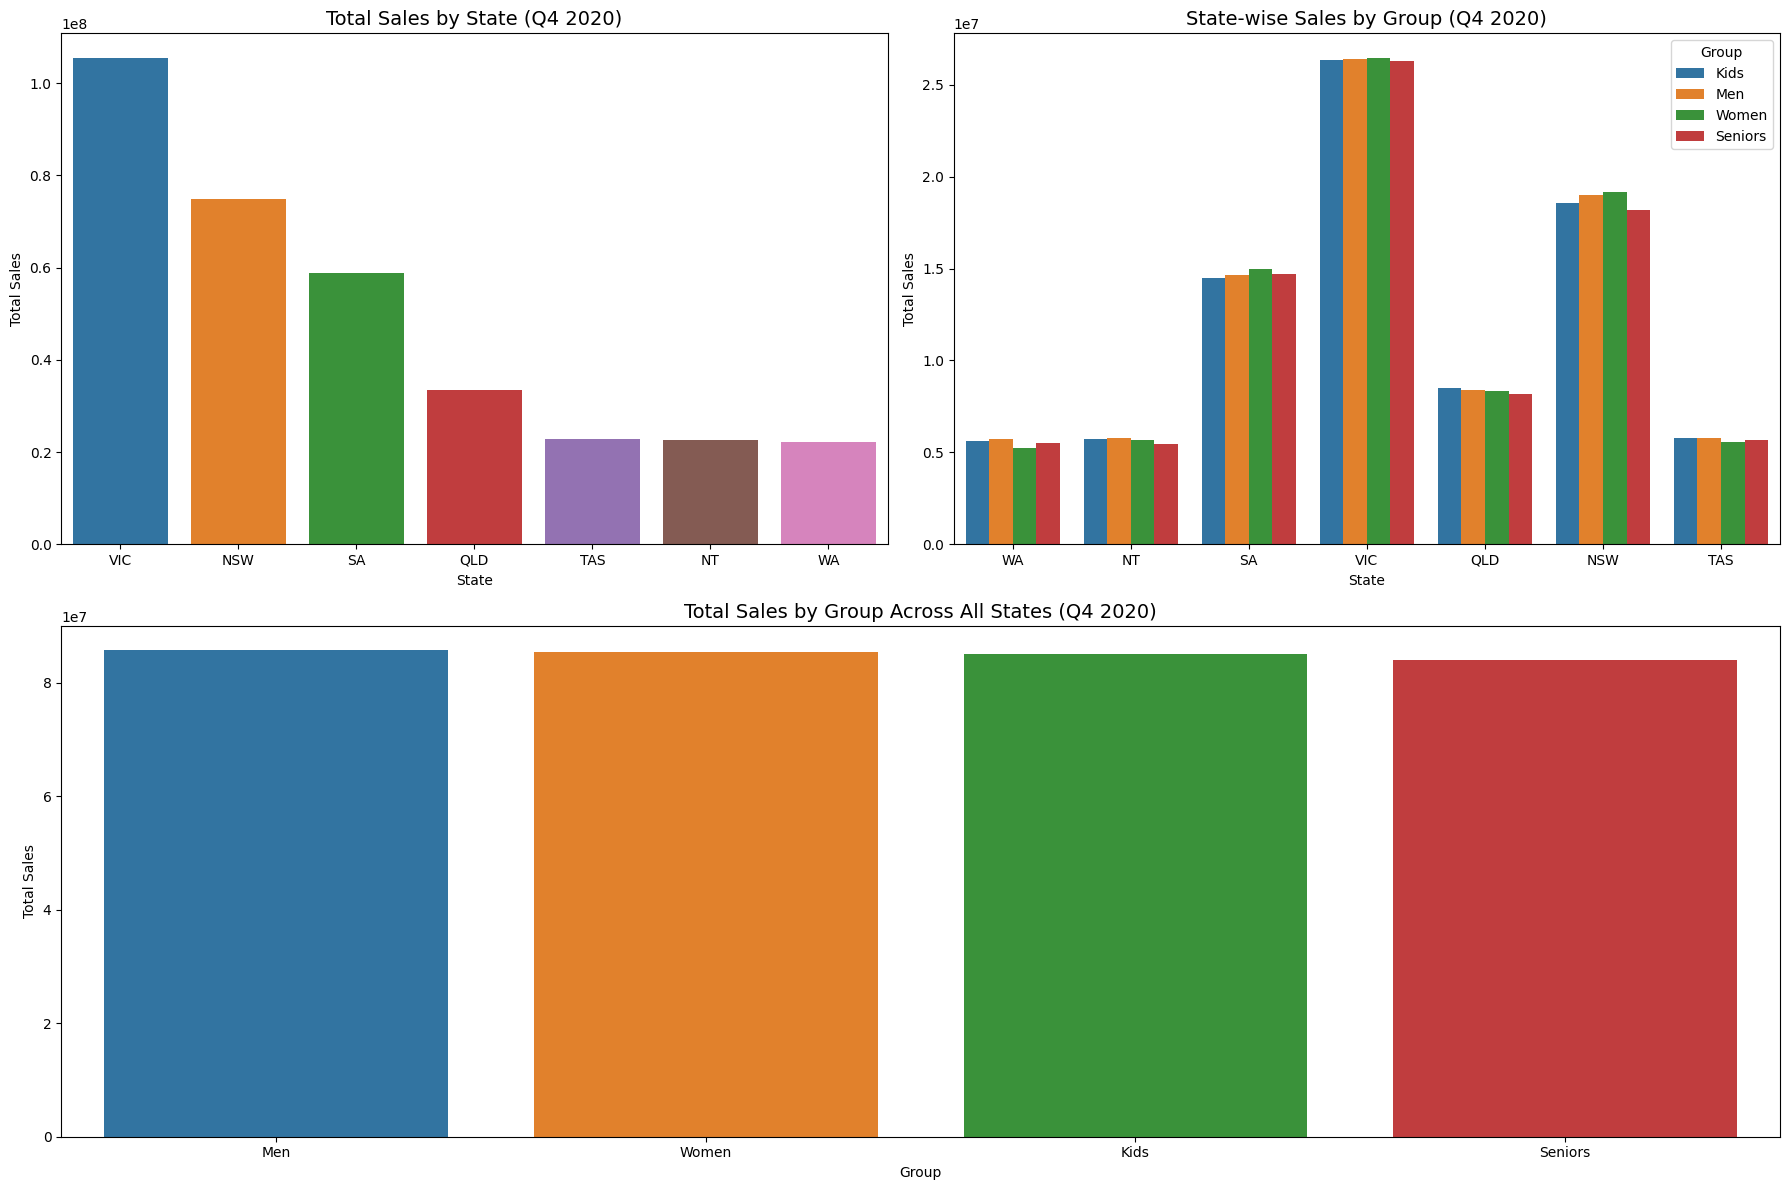

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Pre-aggregations (re-use if already computed) ----
state_totals = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
group_totals = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Create figure + layout
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# ----------------------------------------
# 1. State-wise Total Sales (Top-Left)
# ----------------------------------------
ax1 = fig.add_subplot(gs[0, 0])

sns.barplot(
    x=state_totals.index,
    y=state_totals.values,
    hue=state_totals.index,
    legend=False,
    errorbar=None,
    ax=ax1
)

ax1.set_title('Total Sales by State (Q4 2020)', fontsize=14)
ax1.set_xlabel('State')
ax1.set_ylabel('Total Sales')

# ----------------------------------------
# 2. State-wise Sales by Group (Top-Right)
# ----------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(
    data=df,
    x='State',
    y='Sales',
    hue='Group',
    estimator=sum,
    errorbar=None,
    ax=ax2
)

ax2.set_title('State-wise Sales by Group (Q4 2020)', fontsize=14)
ax2.set_xlabel('State')
ax2.set_ylabel('Total Sales')
ax2.legend(title='Group')

# ----------------------------------------
# 3. Group-wise Sales Across All States (Bottom, Full Width)
# ----------------------------------------
ax3 = fig.add_subplot(gs[1, :])  # span both columns

sns.barplot(
    x=group_totals.index,
    y=group_totals.values,
    hue=group_totals.index,
    legend=False,
    errorbar=None,
    ax=ax3
)

ax3.set_title('Total Sales by Group Across All States (Q4 2020)', fontsize=14)
ax3.set_xlabel('Group')
ax3.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


## Interpretation of Visualizations

### 1. Total Sales by State (Q4 2020)

The bar chart reveals clear revenue differences across Australian states:

- **Victoria (VIC)** generates the highest total sales, exceeding **$105 million**, making it the strongest market for Q4.
- **New South Wales (NSW)** follows with approximately **$75 million**, showing strong consumer activity.
- **South Australia (SA)** is in the mid-range with around **$59 million**.
- **Queensland (QLD)** shows moderate performance at around **$33 million**.
- **Western Australia (WA)**, **Northern Territory (NT)**, and **Tasmania (TAS)** generate the lowest sales, each around **$22–23 million**.

**Insight:**  
VIC accounts for more revenue than the three lowest-performing states combined. States such as WA, NT, and TAS should be prioritized for targeted marketing and sales improvement initiatives.


### 2. State-wise Sales Breakdown by Group (Kids, Men, Women, Seniors)

The grouped bar chart shows how each demographic group contributes to sales within each state:

- In every state, **Men** and **Women** contribute slightly more than **Kids** and **Seniors**, showing consistent buying power in adult demographics.
- In **VIC**, every group shows extremely high sales (around **$26 million each**), confirming VIC as the strongest state regardless of demographic.
- **WA**, **NT**, and **TAS** have noticeably lower bars across all demographic groups, aligning with their lower overall revenue.

**Insight:**  
The demographic distribution is consistent across states, but overall sales volume varies significantly by location. This suggests that marketing strategies should be tailored by region rather than by demographic group alone.


### 3. Group-Level Performance Across All States

Total sales across all states reveal:

- **Men** contribute the highest revenue.
- **Women** are a close second, almost matching Men's revenue.
- **Kids** consistently generate moderate sales.
- **Seniors** represent the lowest overall revenue but still account for a meaningful share.

**Insight:**  
Adult demographics (Men and Women) are the company’s strongest customer segments. Strategies focusing on personalization, loyalty programs, and targeted offers for these groups may yield strong returns.


## 3.2: Time-of-Day Sales Analysis

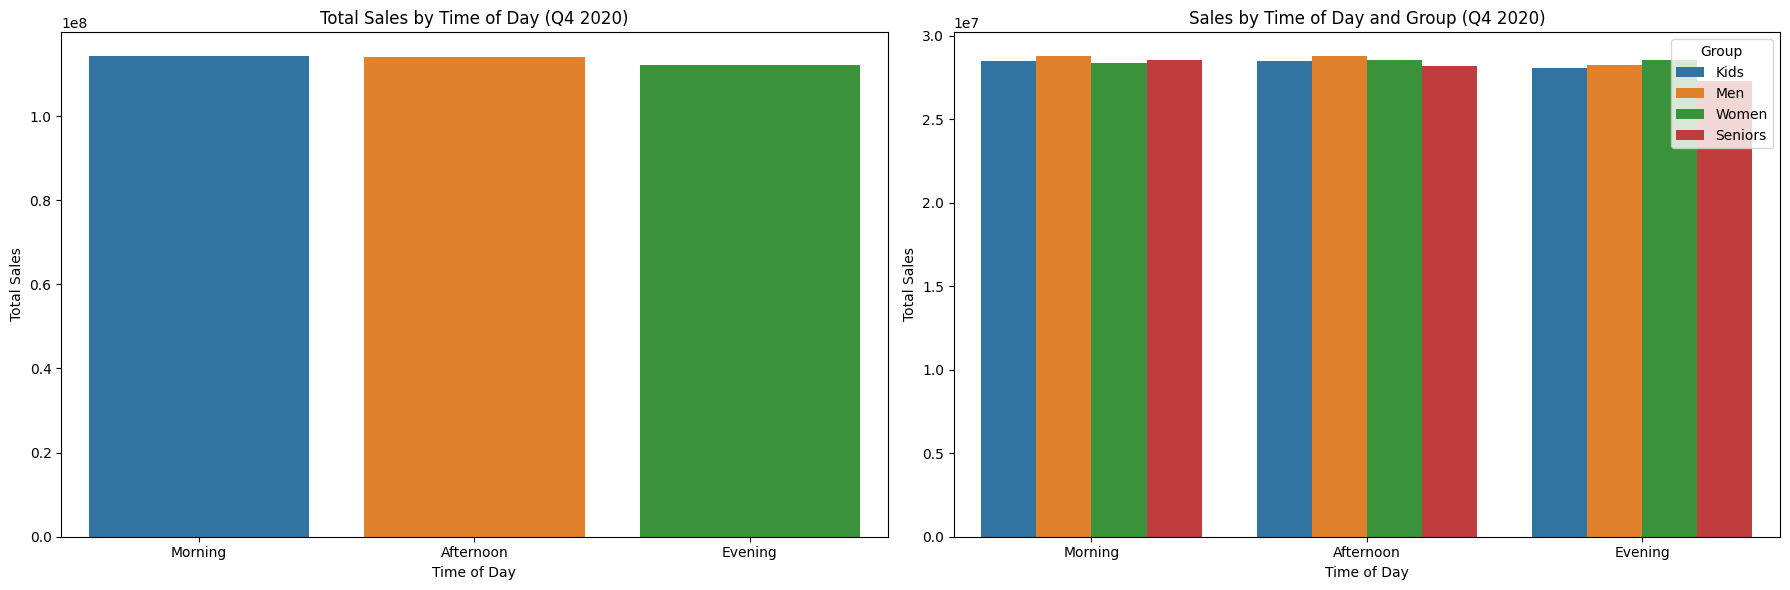

In [43]:


plt.figure(figsize=(18, 6))

# -----------------------------------
# 1. Total Sales by Time of Day
# -----------------------------------
plt.subplot(1, 2, 1)

time_totals = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

sns.barplot(
    x=time_totals.index,
    y=time_totals.values,
    hue=time_totals.index,
    legend=False,
    errorbar=None
)

plt.title('Total Sales by Time of Day (Q4 2020)')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')

# -----------------------------------
# 2. Time of Day Sales by Group
# -----------------------------------
plt.subplot(1, 2, 2)

sns.barplot(
    data=df,
    x='Time',
    y='Sales',
    hue='Group',
    estimator=sum,
    errorbar=None
)

plt.title('Sales by Time of Day and Group (Q4 2020)')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.legend(title='Group')

plt.tight_layout()
plt.show()


### Time-of-Day Sales Analysis (Q4 2020)

#### 1. Total Sales by Time of Day

The bar chart comparing Morning, Afternoon, and Evening sales shows:

- **Morning and Afternoon have nearly identical total sales**, both slightly above \$114 million.
- **Evening shows a small decline**, with total sales slightly lower than Morning and Afternoon.
- The differences between the three periods are minimal, indicating that **customer activity is strong and consistent throughout the day**.

**Insight:**  
There is no dramatic peak or off-peak period. Sales remain steady across all times of day, suggesting that AAL has balanced customer engagement and foot traffic regardless of time.


#### 2. Time-of-Day Sales by Group (Kids, Men, Women, Seniors)

The grouped bar chart reveals:

- All groups follow the same pattern across time-of-day categories.
- **Men, Women, Kids, and Seniors each show nearly identical sales levels in Morning, Afternoon, and Evening.**
- **Men and Women consistently lead sales slightly** across all three periods.
- **Kids and Seniors also contribute strong and steady sales**, showing


## 3.3 Time-Based Charts

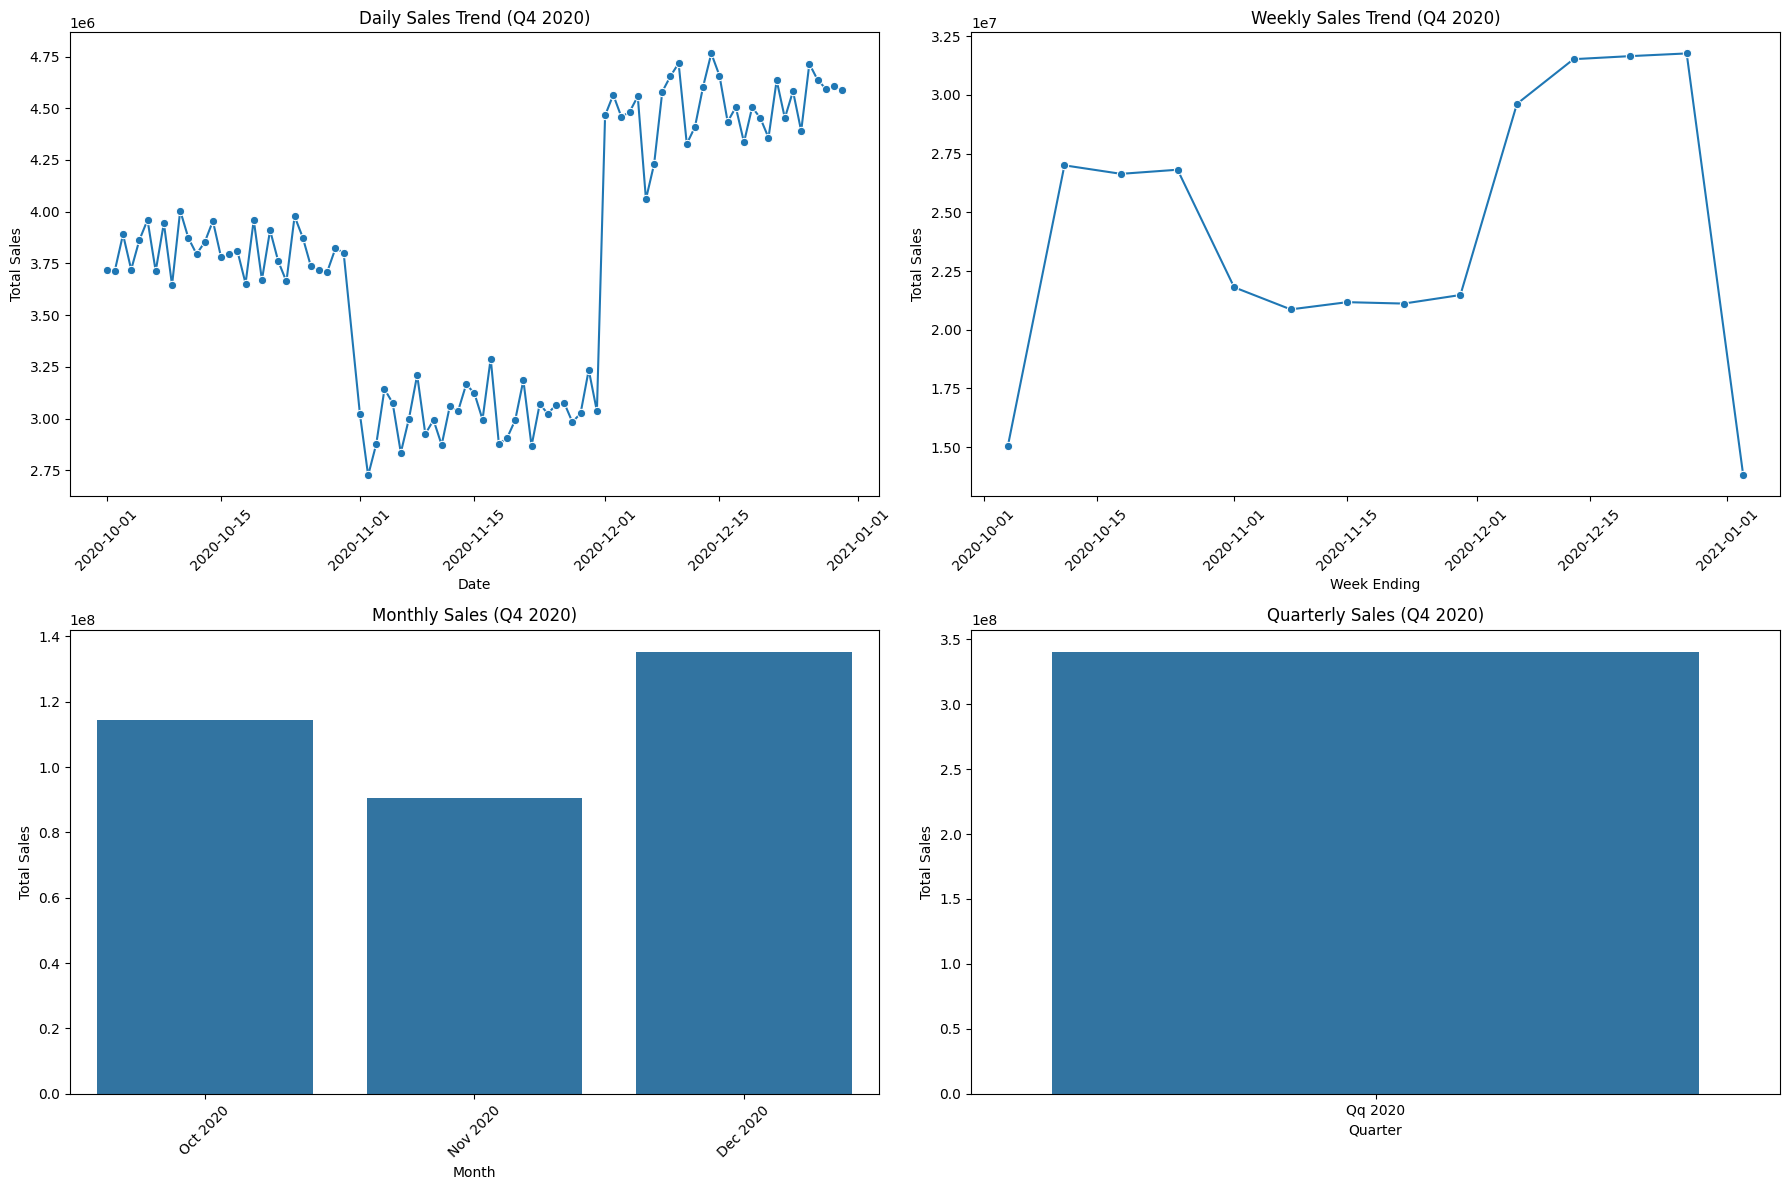

In [42]:
# Time-Based Charts (Daily, Weekly, Monthly, Quarterly)

# Prepare data
daily_sales = df.groupby('Date')['Sales'].sum()
weekly_sales = df.resample('W', on='Date')['Sales'].sum()
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
quarterly_sales = df.resample('QE', on='Date')['Sales'].sum()

plt.figure(figsize=(18, 12))

# ---------------------------
# 1. Daily Sales – Line Plot
# ---------------------------
plt.subplot(2, 2, 1)
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o')
plt.title('Daily Sales Trend (Q4 2020)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# ---------------------------
# 2. Weekly Sales – Line Plot
# ---------------------------
plt.subplot(2, 2, 2)
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o')
plt.title('Weekly Sales Trend (Q4 2020)')
plt.xlabel('Week Ending')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# ---------------------------
# 3. Monthly Sales – Bar Chart
# ---------------------------
plt.subplot(2, 2, 3)
sns.barplot(
    x=monthly_sales.index.strftime('%b %Y'),
    y=monthly_sales.values,
    errorbar=None
)
plt.title('Monthly Sales (Q4 2020)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# ---------------------------
# 4. Quarterly Sales – Bar Chart
# ---------------------------
plt.subplot(2, 2, 4)
sns.barplot(
    x=quarterly_sales.index.strftime('Q%q %Y'),
    y=quarterly_sales.values,
    errorbar=None
)
plt.title('Quarterly Sales (Q4 2020)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


### Time-Based Sales Analysis

#### 1. Daily Sales Trend (Line Plot)

The daily sales chart captures the day-to-day fluctuations throughout Q4 2020:

- Early October begins with moderate daily sales between \$3.7M and \$4.0M.
- There is a noticeable dip beginning in early November, where daily sales fall to around \$2.7M–\$3.2M.
- Beginning in December, sales rise sharply, with daily totals consistently above \$4.4M and peaking near \$4.8M.
- The sustained increase throughout December corresponds with holiday shopping activity.

**Insight:**  
Daily sales demonstrate strong seasonality. The beginning of November marks the slowest period, while December experiences a dramatic surge due to holiday demand. This highlights the need for strategic inventory management and staffing during these peak periods.


#### 2. Weekly Sales Trend (Line Plot)

The weekly sales chart smooths out daily variation, showing clear weekly trends:

- The lowest weekly sales occur in the first week of October (approx. \$15M).
- Weekly sales climb in mid-to-late October to around \$26M–\$27M.
- A slowdown occurs from early to mid-November, where weekly sales level off around \$21M.
- A major spike occurs starting in early December, with weekly sales surpassing \$31M toward the end of the month—the highest weekly totals of the quarter.

**Insight:**  
The holiday season in December is the primary sales driver. The weekly trend confirms the seasonal cycle: early quarter ramp-up → mid-quarter dip → strong year-end surge.


#### 3. Monthly Sales Comparison (Bar Chart)

Monthly totals clearly show the growth pattern across the quarter:

- **October:** \$114.29M  
- **November:** \$90.68M (the lowest of the quarter)  
- **December:** \$135.33M (the highest of the quarter)

**Insight:**  
The significant increase in December highlights seasonal shopping behavior, while November’s lower sales suggest an opportunity for targeted promotions or sales events to boost mid-quarter performance.


#### 4. Quarterly Sales Summary (Bar Chart)

The quarterly sales chart presents the total revenue for Q4 2020:

- **Q4 Total Sales:** \$340.3M

**Insight:**  
Q4 is a highly profitable quarter for AAL, largely fueled by the December surge. This reinforces the importance of year-end strategic planning, holiday-focused promotions, and ensuring appropriate stock levels during this high-demand period.



## 3.4 Other Beneficial Visualizations

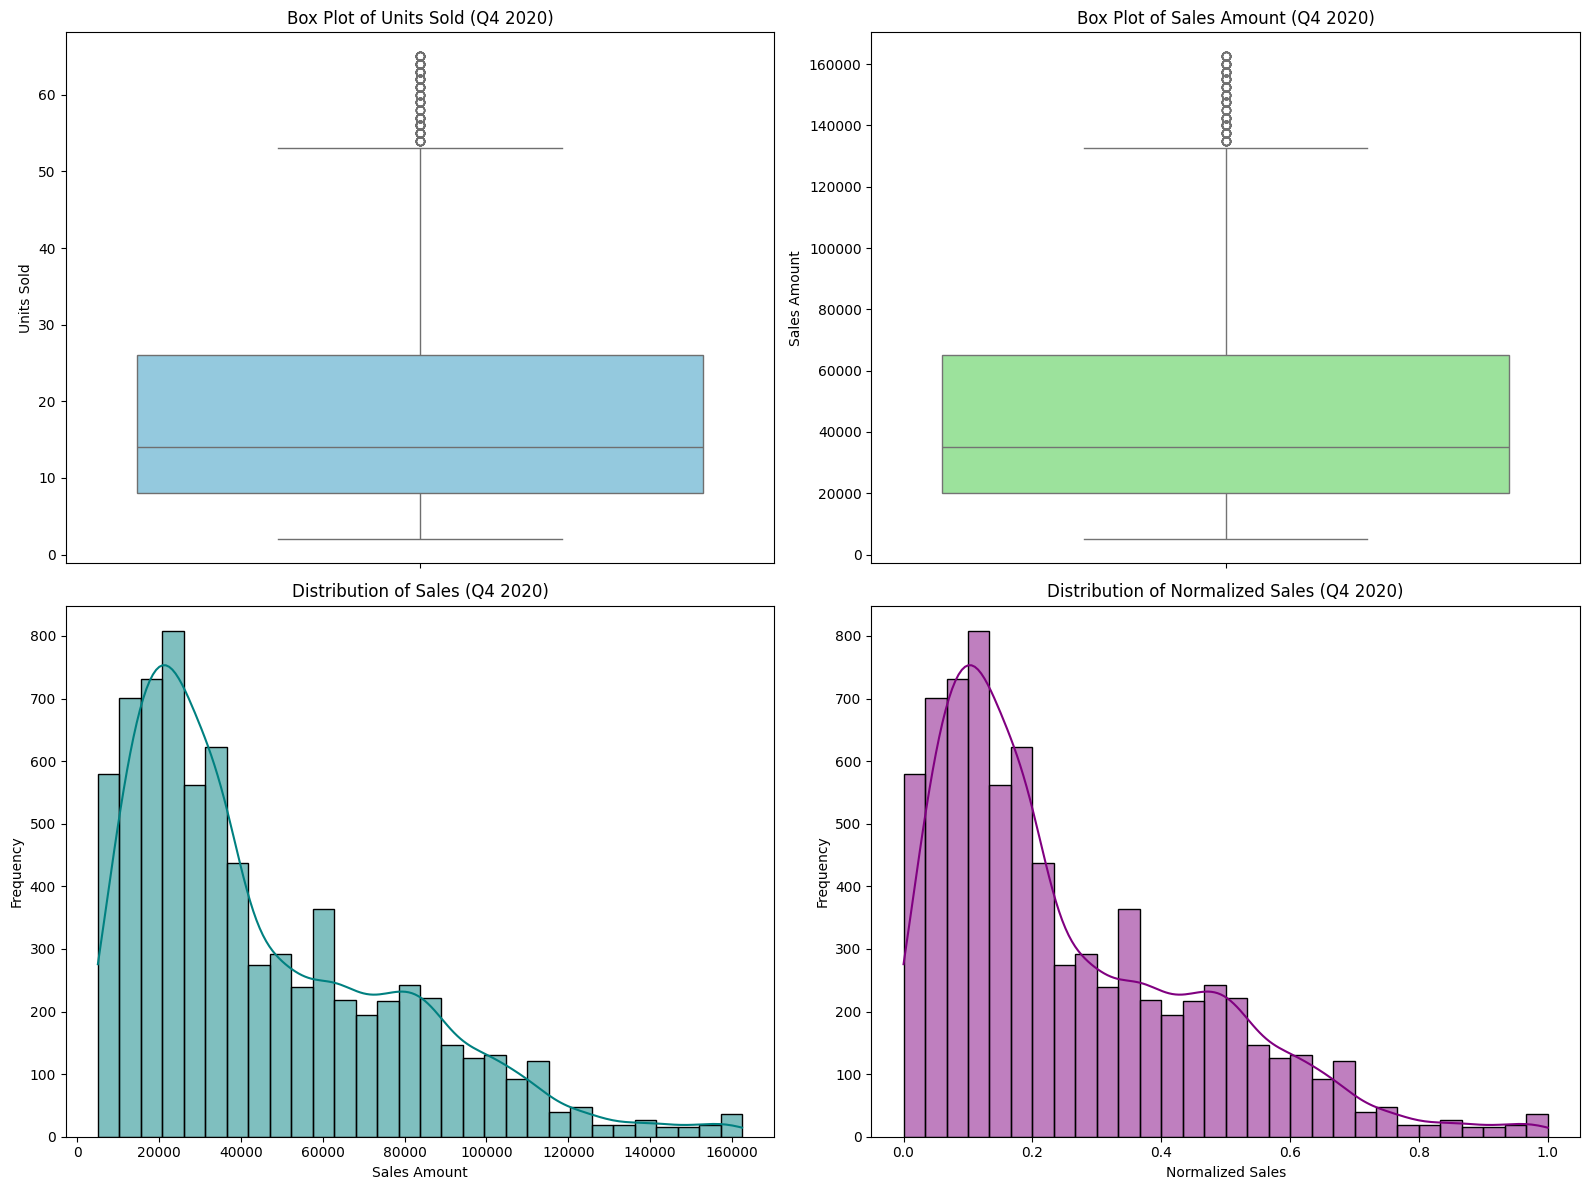

In [40]:
# Four Plots (Boxplots + Distributions)

plt.figure(figsize=(16, 12))

# ---------------------------
# 1. Boxplot – Units Sold
# ---------------------------
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Unit'], color='skyblue')
plt.title('Box Plot of Units Sold (Q4 2020)')
plt.ylabel('Units Sold')

# ---------------------------
# 2. Boxplot – Sales Amount
# ---------------------------
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Sales'], color='lightgreen')
plt.title('Box Plot of Sales Amount (Q4 2020)')
plt.ylabel('Sales Amount')

# ---------------------------
# 3. Distribution – Sales
# ---------------------------
plt.subplot(2, 2, 3)
sns.histplot(df['Sales'], bins=30, kde=True, color='teal')
plt.title('Distribution of Sales (Q4 2020)')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')

# ---------------------------
# 4. Distribution – Normalized Sales
# ---------------------------
plt.subplot(2, 2, 4)
sns.histplot(df['Sales_norm'], bins=30, kde=True, color='purple')
plt.title('Distribution of Normalized Sales (Q4 2020)')
plt.xlabel('Normalized Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Boxplots and Distribution Plots

### Box Plot of Units Sold (Q4 2020)

The box plot of **Units Sold** summarizes how many units customers typically purchase in a single transaction.

**Key Observations:**
- The median number of units sold is around **14**.
- The middle 50% of transactions fall between **8 and 26 units**.
- A long upper whisker and several high-value points indicate **right-skew** and the presence of large, less frequent purchases.
- There are no abnormal or unexpected outliers.

**Insight:**  
Most sales involve small to moderate numbers of units, but some customers make significantly larger purchases—this increases the overall variability of unit quantities.


### Box Plot of Sales Amount (Q4 2020)

The box plot of **Sales Amount** shows the distribution of transaction values.

**Key Observations:**
- The median sales amount is approximately **$35,000**.
- The IQR ranges from **$20,000 to $65,000**.
- A long upper whisker extends toward **$162,500**, confirming **right-skewness**.
- High-value transactions create natural outliers, which are expected in retail.

**Insight:**  
While most sales fall within a predictable mid-range, occasional large transactions significantly lift the mean, reflecting diverse customer spending patterns.


### Distribution of Sales (Histogram + KDE)

The distribution plot for **Sales** reveals useful details about the shape and spread of transaction amounts.

**Key Observations:**
- The distribution is **right-skewed**, with most sales falling between **$20,000 and $40,000**.
- The KDE curve shows a strong peak around this mid-range.
- A long tail stretches toward higher values, representing large, less frequent purchases.

**Insight:**  
The concentration of transactions in a mid-range price band suggests stable purchasing behavior, while the tail indicates occasional bulk purchases or premium orders.


### Distribution of Normalized Sales (0–1 Scale)

This distribution shows how the normalization process transforms the original sales data.

**Key Observations:**
- The overall shape is preserved from the original distribution, as expected with min–max normalization.
- Most values cluster between **0.1 and 0.4**, corresponding to the middle of the original sales range.
- The KDE curve again reflects a right-skewed pattern.

**Insight:**  
Normalization compresses the data into a standardized range while retaining its distributional characteristics. This is useful for modeling, comparison across features, and scaling-sensitive algorithms.



## Final Summary & Recommendations

### Summary of Key Findings

Analysis of AAL’s Q4 2020 apparel sales across all Australian states reveals several important patterns:

1. **Victoria (VIC) dominates total revenue**, generating over **$105 million**, outperforming every other state by a large margin. New South Wales (NSW) and South Australia (SA) follow, while Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) are the weakest performers.

2. **Across all demographic groups (Kids, Men, Women, Seniors)**, the distribution of sales is consistent across states.  
   - **Men and Women contribute the highest sales**,  
   - **Kids follow closely**,  
   - **Seniors consistently generate the lowest revenue**, though still significant.

3. **Time-of-day analysis** shows sales remain **strong and steady across Morning, Afternoon, and Evening**, with no clear off-peak period. This suggests consistent customer engagement throughout the day.

4. **Time-based trends** show predictable retail seasonality:
   - **Daily and weekly sales dip in early November**,  
   - **Steep climb through December**, reaching the highest weekly and monthly totals of the quarter.  
   - **December is the peak month** with **$135M in sales**, compared to $90M in November.

5. **Boxplots and distribution analyses** reveal right-skewed distributions for both Units and Sales, indicating:
   - Most purchases fall within moderate ranges,
   - Occasional large orders significantly raise the mean,
   - Data variability is natural and expected for high-volume retail.

Overall, **Q4 2020 produced over $340 million in revenue**, driven largely by the December holiday season and strong performance from adult demographics in VIC and NSW.

---

### Strategic Recommendations

Based on the findings, the following recommendations are proposed for the Sales & Marketing (S&M) team:

#### 1. **Expand footprint and marketing efforts in high-performing states**
- **VIC and NSW** should be prioritized for:
  - New store openings  
  - Premium product launches  
  - Loyalty programs  
  - Personalized marketing campaigns  
- These states consistently outperform others and offer strong growth potential.

#### 2. **Develop targeted campaigns for low-performing regions**
- **WA, NT, and TAS** show significantly lower revenue.
- Recommend:
  - Localized promotions (seasonal discounts, bundled offers)  
  - Geo-targeted ads  
  - Community-specific events  
  - Improved store visibility and merchandising  

Such interventions can boost engagement where sales are currently weakest.

#### 3. **Capitalize on December’s proven demand surge**
- Increase inventory levels for December across all regions.
- Strengthen holiday marketing campaigns:
  - Gift bundles  
  - Seasonal collections  
  - Flash sales  
  - “Next Best Offer” personalized recommendations  

The data shows December consistently drives peak sales.

#### 4. **Enhance adult demographic engagement**
- Since **Men and Women** drive the highest sales:
  - Expand adult product lines  
  - Introduce style-based recommendation systems  
  - Promote cross-selling (accessories, bundled outfits)  

These groups respond strongly to targeted messaging and curated selections.

#### 5. **Maintain consistent staffing and operations throughout the day**
- Since sales remain stable from **Morning → Afternoon → Evening**,  
  staffing and in-store service levels should be consistent.
- No need for heavy time-shifting of team resources.

#### 6. **Use normalized sales data for advanced analytics**
- The normalized metrics created in this analysis can support:
  - Machine learning models  
  - Predictive sales forecasting  
  - Customer segmentation  
  - Trend detection  

Normalized values prevent scale distortion and improve model performance.

---

### Conclusion

AAL’s Q4 2020 performance was strong, with robust revenue across demographic groups and a significant seasonal lift in December.  
By focusing on high-potential regions, improving performance in underperforming states, and optimizing marketing efforts around key demographic segments and peak periods, AAL can strengthen its market presence and accelerate revenue growth in the coming year.

This analysis provides a clear roadmap for data-driven decision-making as the company evaluates expansion opportunities and strategic initiatives.
